# Visualization - understanding the data

In [1]:
pip install pygal_maps_world

Note: you may need to restart the kernel to use updated packages.


import our librarys:

In [2]:
import pickle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import seaborn as sns
import pygal
from pygal.style import Style
from collections import Counter
from sklearn.decomposition import PCA
from IPython.display import SVG
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import our data after cleaning:

In [3]:
df = pd.read_csv("All London 2012 athletes cleaning.csv")
df.head()

,Name,Country,Age,"Height, cm",Weight,Sex,Date of birth,Place of birth,Gold,Silver,Bronze,Total,Sport,Event
0,Lamusi A,People's Republic of China,23,170.0,60.0,M,6/2/1989,NEIMONGGOL (CHN),0,0,0,0,Judo,Men's -60kg
1,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Sheldon (USA),0,0,0,0,Athletics,Men's Hammer Throw
2,Jamale Aarrass,France,30,187.0,76.0,M,11/15/1981,BEZONS (FRA),0,0,0,0,Athletics,Men's 1500m
3,Maria Abakumova,Russian Federation,26,178.0,85.0,F,1/15/1986,STAVROPOL REGION (RUS),0,0,0,0,Athletics,Women's Javelin Throw
4,Emanuele Abate,Italy,27,190.0,80.0,M,7/8/1985,Genova (ITA),0,0,0,0,Athletics,Men's 110m Hurdles


### visual by pie chart:

we can see that the number of females and males is very close ro each other.

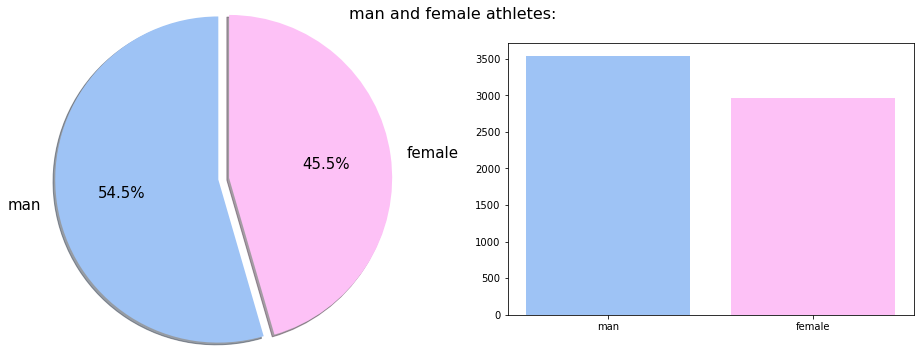

In [4]:
gender_series = df['Sex'].value_counts()
gender_val = gender_series.values.tolist()
gender_indx = ['man', 'female']
gender_colrs = ['#9EC3F5' ,'#FDC1F6']

fig, axes = plt.subplots(1,2, figsize=(16,5))

fig.suptitle('man and female athletes:', size=16)

axes[0].pie(gender_val, labels=gender_indx, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05), radius=1.5, colors= gender_colrs, textprops={'fontsize':15})

axes[1].bar(gender_indx, gender_val, color=gender_colrs)

fig.show()

we want to check the num of athlete in which sport category:

Text(0.5, 0, 'kind of sport')

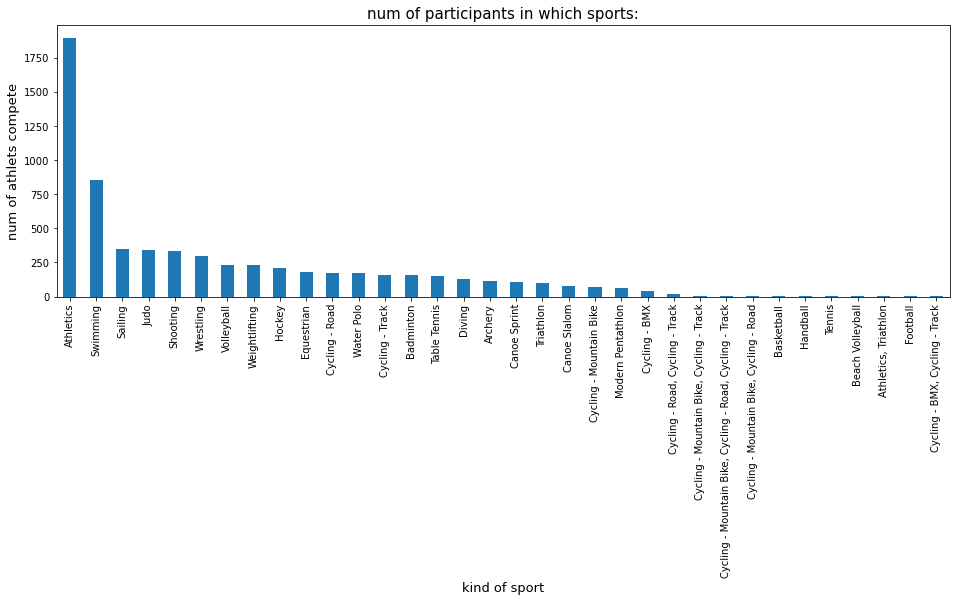

In [5]:
fig = plt.figure(figsize=(16,5))
df["Sport"].value_counts().plot(kind='bar')
plt.title('num of participants in which sports:', size=(15))
plt.ylabel('num of athlets compete',size=(13))
plt.xlabel('kind of sport', size=(13))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height, cm'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Gold'}>,
        <AxesSubplot:title={'center':'Silver'}>,
        <AxesSubplot:title={'center':'Bronze'}>],
       [<AxesSubplot:title={'center':'Total'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

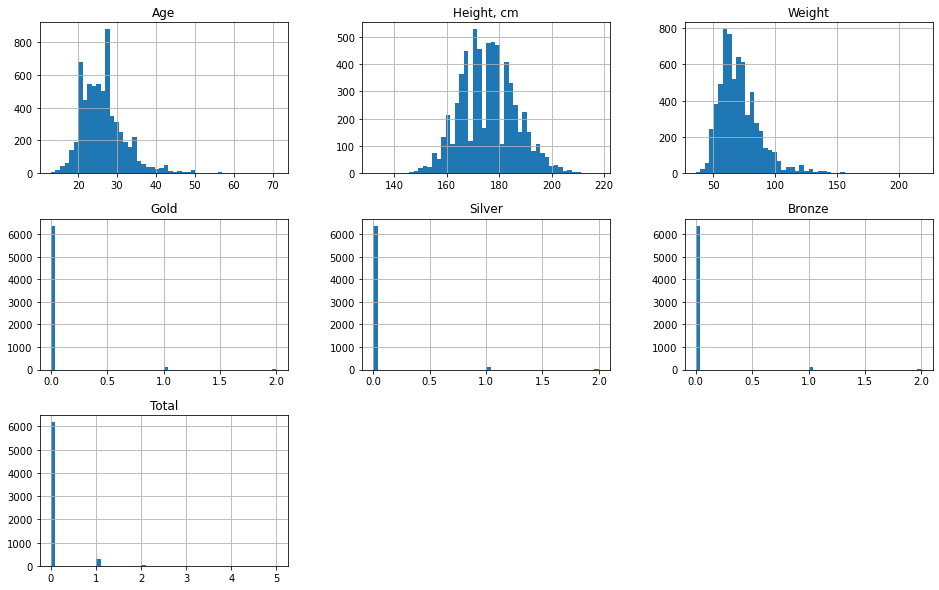

In [6]:
fig = plt.figure(figsize = (16,10))
ax = fig.gca()
df.hist(ax = ax,bins=50)

we want to check the connection between the Total amount of medals by the height of the athlets:

<AxesSubplot:xlabel='Total', ylabel='Height, cm'>

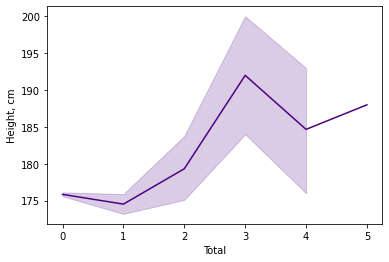

In [7]:
sns.lineplot(x='Total', y='Height, cm', data=df, color = 'indigo')

we want to check the connection between the Total amount of medals by the weight of the athlets:

<AxesSubplot:xlabel='Total', ylabel='Weight'>

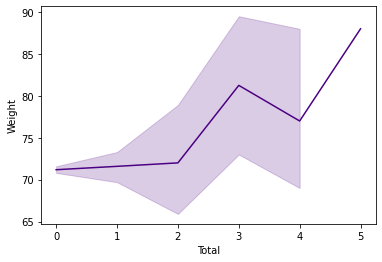

In [8]:
sns.lineplot(x='Total', y='Weight', data=df, color = 'indigo')

##### This visualization technique usually shows the magnitude of a phenomenon as color in two dimensions. Thus, it can be used to show three variables together. In this type of graph two of the three variables are taken to influence - or explain - the third.

##### Heatmaps show us values as a function of two dimensions. 

<AxesSubplot:>

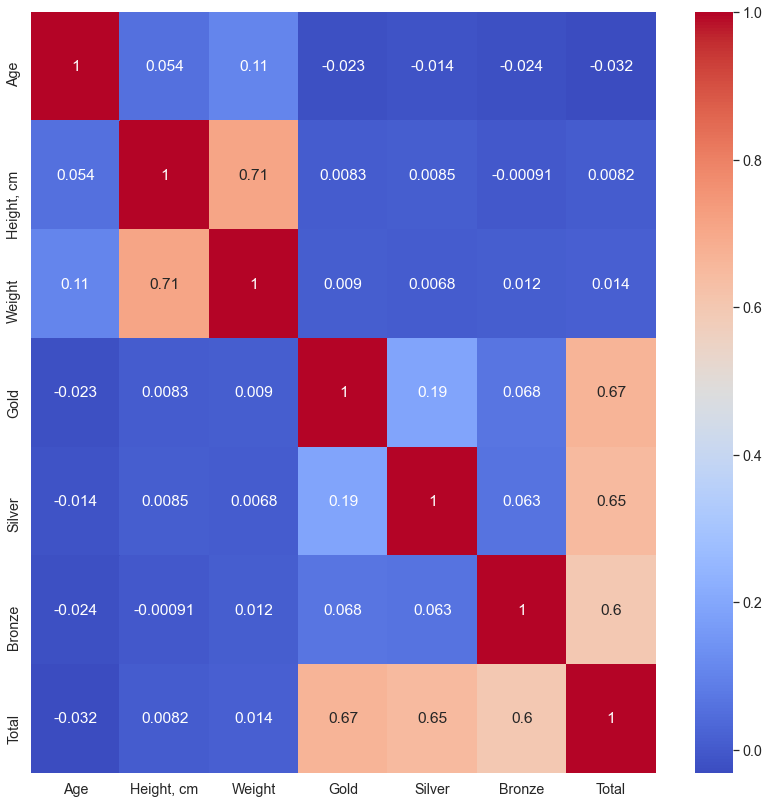

In [9]:
relevantCols = df[df.columns[(df.columns != 'Place of birth')& (df.columns != 'Sport')]]

plt.figure(figsize = (14,14))
df = pd.DataFrame(df, columns = relevantCols.columns)
sns.set(font_scale=1.3)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

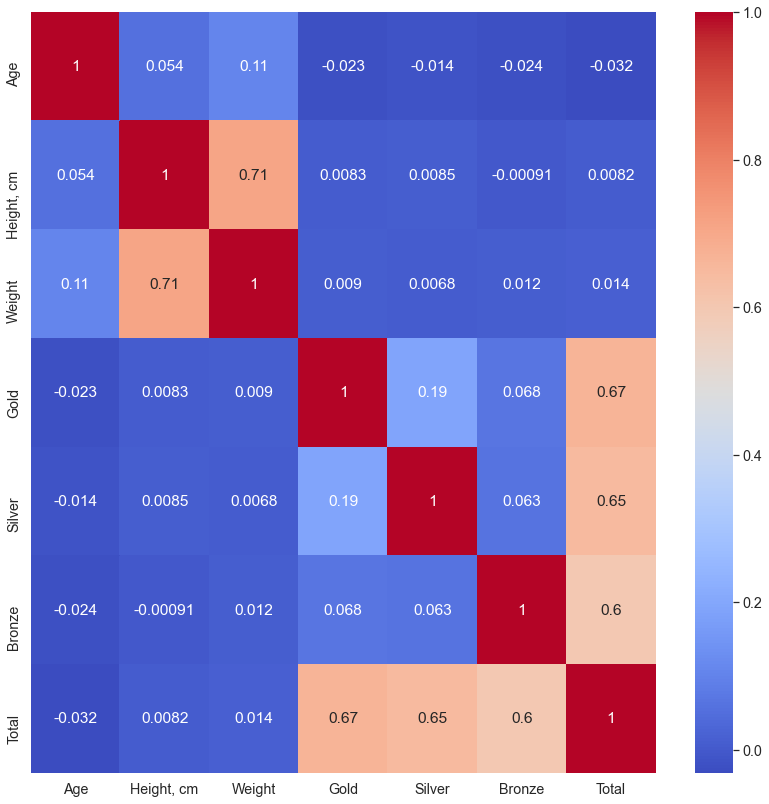

In [10]:
plt.figure(figsize = (14,14))
sns.set(font_scale=1.3)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='Age', ylabel='Density'>

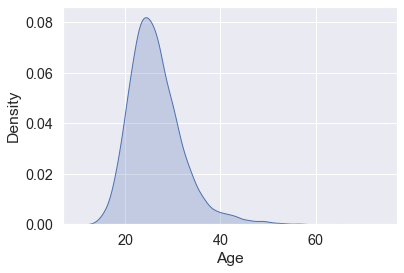

In [11]:
sns.kdeplot(df.Age, shade=True)

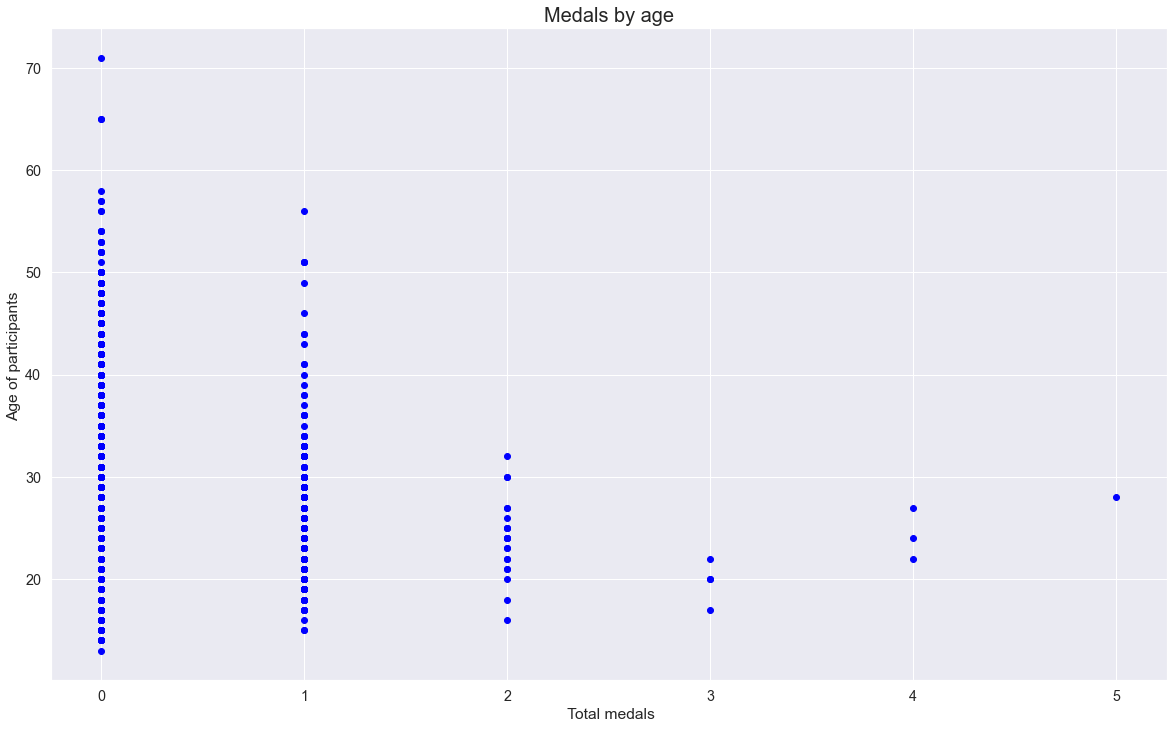

In [13]:
scat1 = plt.figure(figsize=(20,12))
plt.title("Medals by age", fontsize=20)
plt.scatter(df['Total'], df['Age'], c ="blue")
plt.xlabel(" Total medals")
plt.ylabel("Age of participants ")
plt.show()

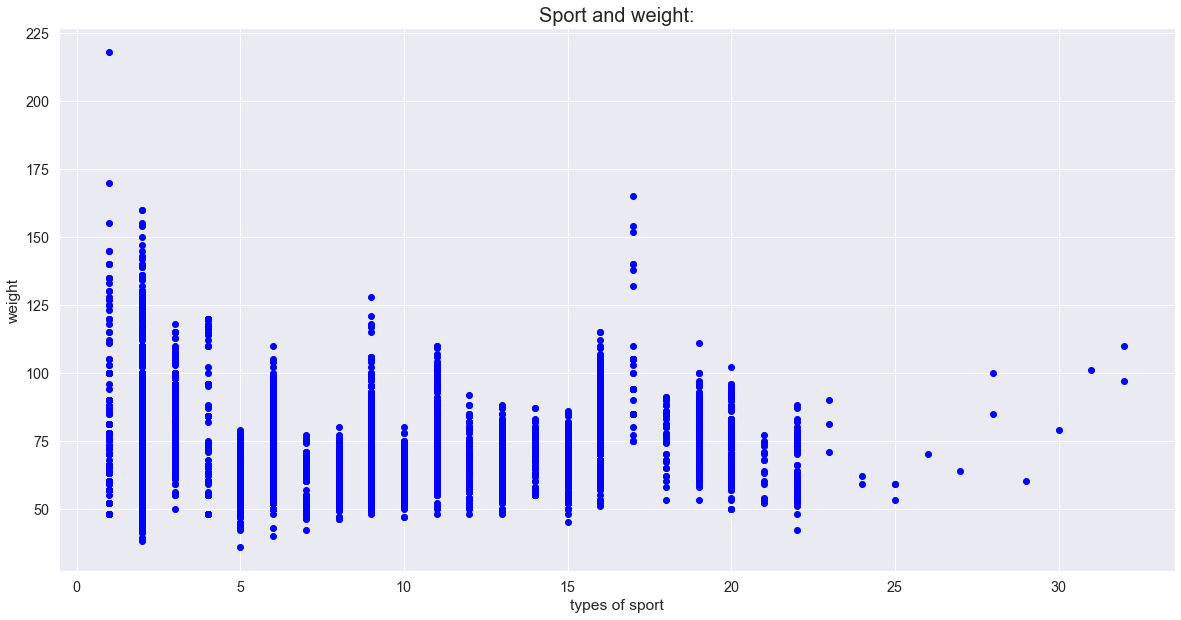

In [14]:
df= pd.read_csv("All London 2012 athletes numeric only.csv")
scat1 = plt.figure(figsize=(20,10))
plt.title("Sport and weight:", fontsize=20)
plt.scatter(df['Sport'], df['Weight'], c ="blue")
plt.xlabel("types of sport")
plt.ylabel("weight")
plt.show()


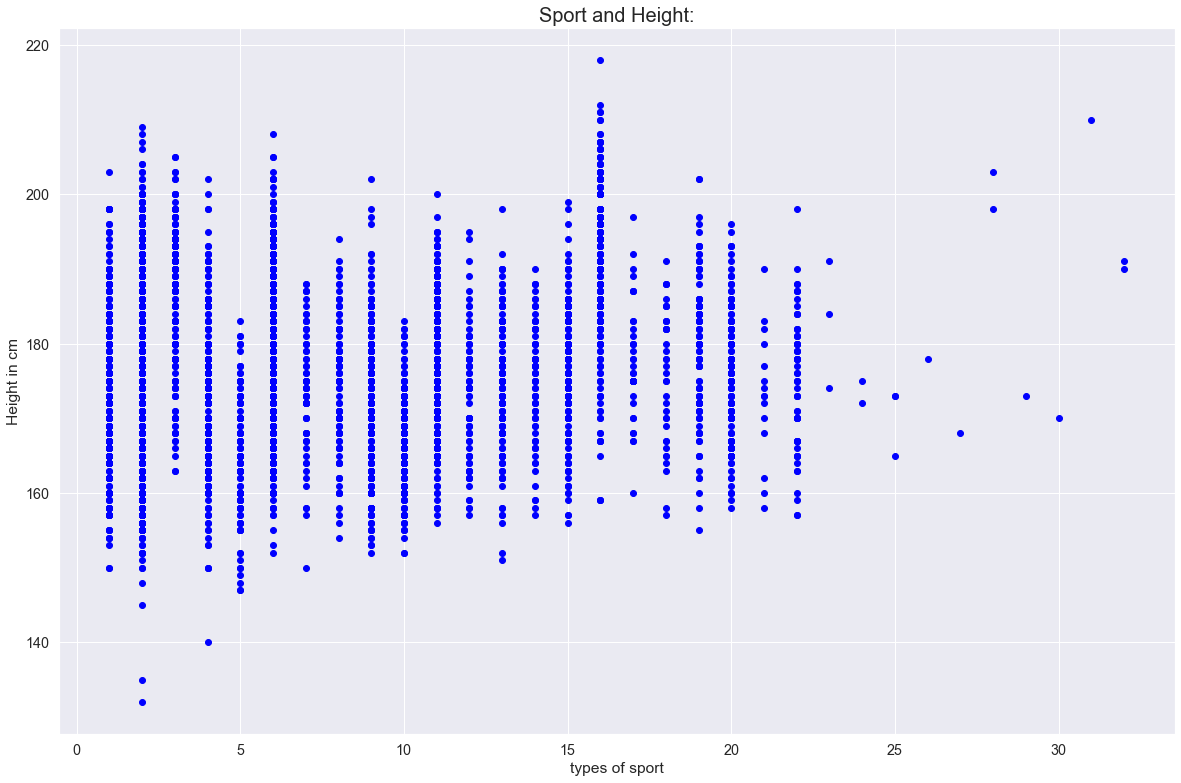

In [15]:
df= pd.read_csv("All London 2012 athletes numeric only.csv")
scat1 = plt.figure(figsize=(20,13))
plt.title("Sport and Height:", fontsize=20)
plt.scatter(df['Sport'], df['Height, cm'], c ="blue")
plt.xlabel("types of sport")
plt.ylabel("Height in cm")
plt.show()

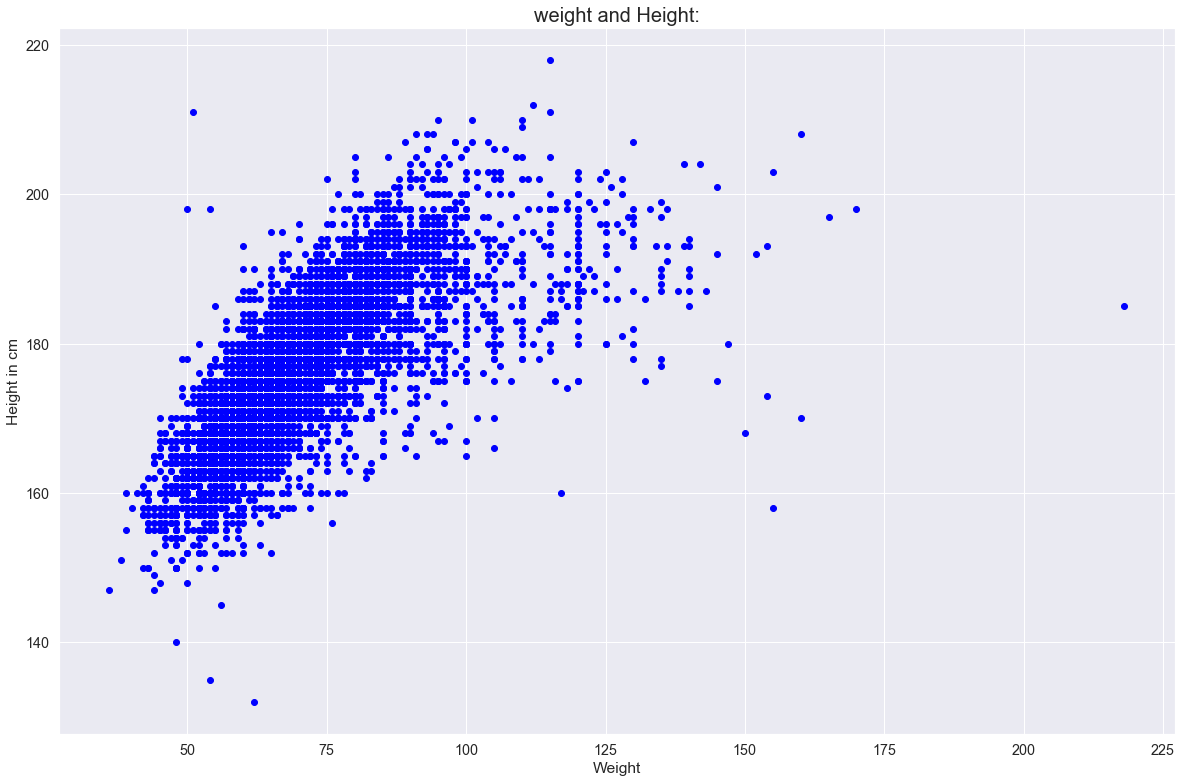

In [16]:
df= pd.read_csv("All London 2012 athletes numeric only.csv")
scat1 = plt.figure(figsize=(20,13))
plt.title("weight and Height:", fontsize=20)
plt.scatter(df['Weight'], df['Height, cm'], c ="blue")
plt.xlabel("Weight")
plt.ylabel("Height in cm")
plt.show()

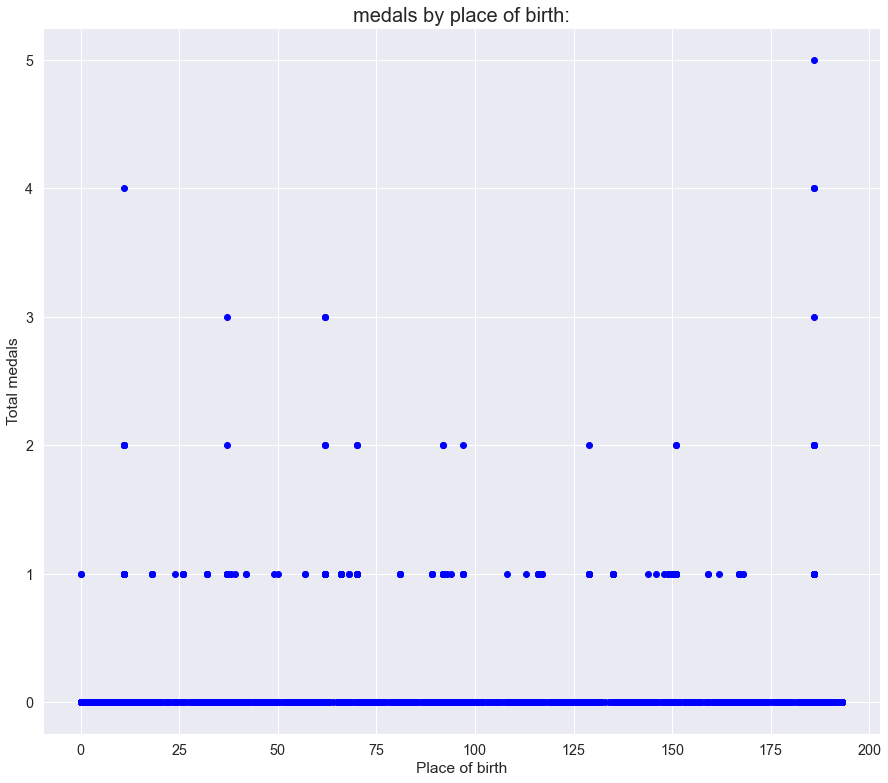

In [17]:
df= pd.read_csv("All London 2012 athletes numeric only.csv")
scat1 = plt.figure(figsize=(15,13))
plt.title("medals by place of birth:", fontsize=20)
plt.scatter(df['Place of birth'], df['Total'], c ="blue")
plt.xlabel("Place of birth")
plt.ylabel("Total medals")
plt.show()

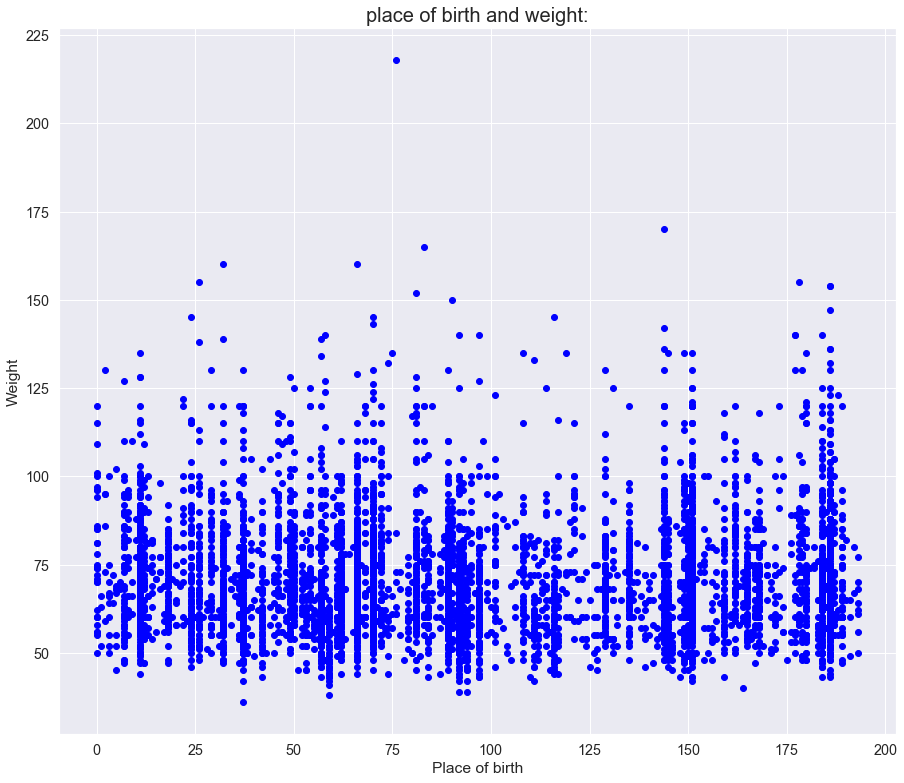

In [18]:
df= pd.read_csv("All London 2012 athletes numeric only.csv")
scat1 = plt.figure(figsize=(15,13))
plt.title("place of birth and weight:", fontsize=20)
plt.scatter(df['Place of birth'], df['Weight'], c ="blue")
plt.xlabel("Place of birth")
plt.ylabel("Weight")
plt.show()

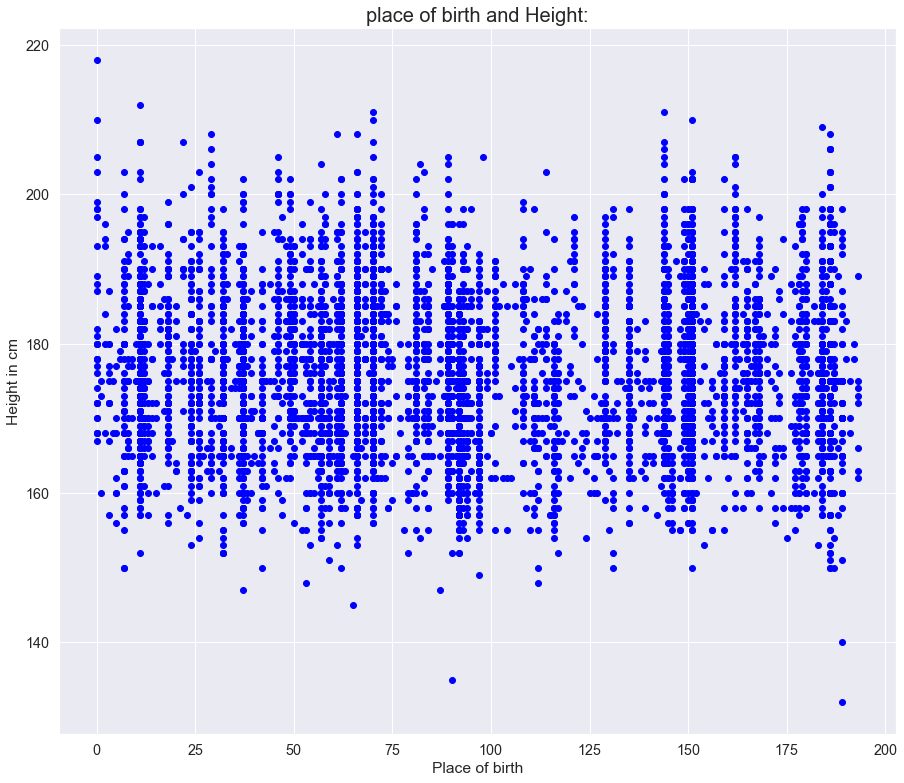

In [19]:
df= pd.read_csv("All London 2012 athletes numeric only.csv")
scat1 = plt.figure(figsize=(15,13))
plt.title("place of birth and Height:", fontsize=20)
plt.scatter(df['Place of birth'], df['Height, cm'], c ="blue")
plt.xlabel("Place of birth")
plt.ylabel("Height in cm")
plt.show()

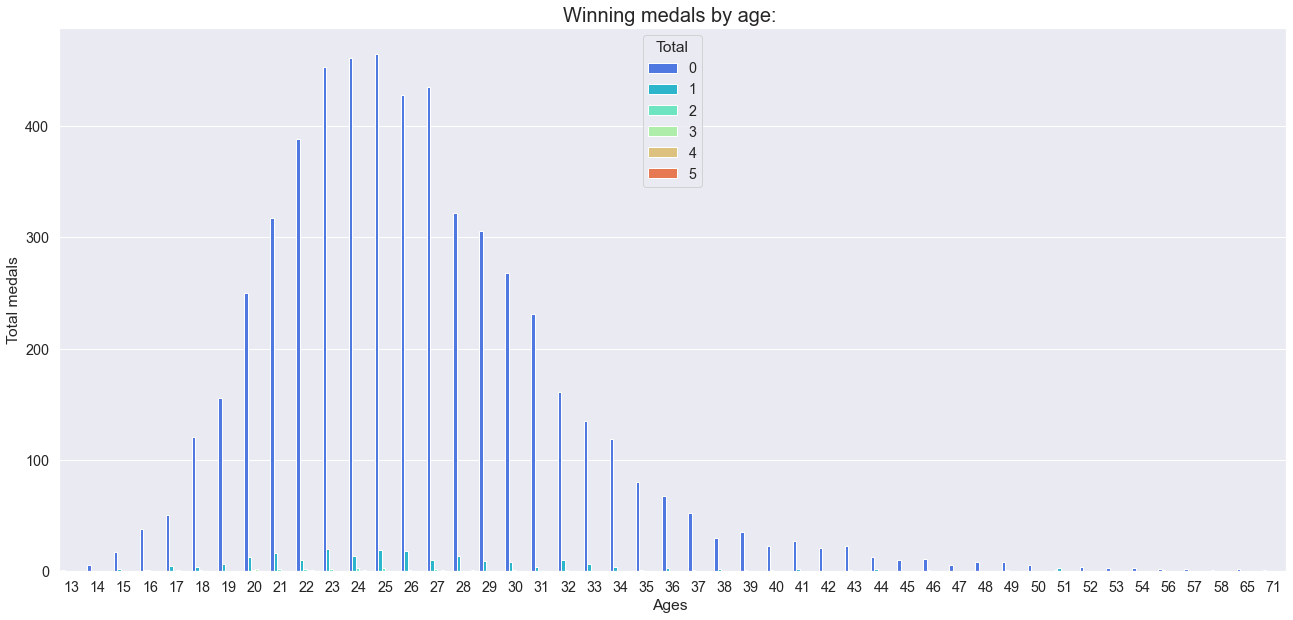

In [21]:
plt.figure(figsize=(22,10))
sns.countplot(x='Age',data=df, palette='rainbow',hue='Total')
plt.title("Winning medals by age: ", size=20)
plt.xlabel("Ages ")
plt.ylabel(" Total medals ")
plt.show()

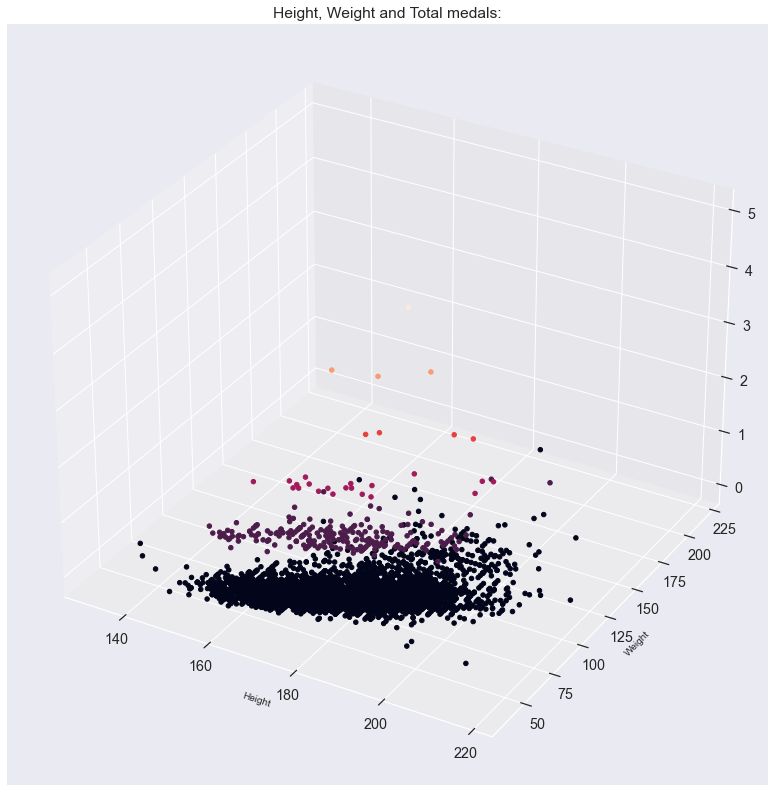

In [22]:
fig = plt.figure(figsize = (22, 14))
ax= plt.axes(projection='3d')
xdata= df['Height, cm']
ydata= df['Weight']
zdata= df['Total']

plt.title("Height, Weight and Total medals:")

plt.xlabel('Height', size=10)
plt.ylabel('Weight', size=10)
ax.scatter3D(xdata, ydata,zdata,c= zdata, depthshade= False)
plt.show()